In [ ]:
# 화면에 표시할 행과 열의 최대 갯 수
import pandas as pd
df_auto = pd.read_csv('dataset/auto-mpg.csv')

pd.options.display.max_rows = 9
pd.options.display.max_columns = 10

# pd.set_option('max_rows', 5)
# pd.set_option('max_columns', 10)

df_auto


In [ ]:
# df_auto 데이터 세트에 대한 파악 내용을 기술하세요.
# df_auto.info() # 데이터 정보
# df_auto.shape # 데이터 형태 파악
df_auto.describe() # 데이터 요약

In [ ]:
mcar.horsepower.value_counts() # 값이 몇개 있는지
mcar.horsepower.unique()

In [ ]:
df_auto.columns

In [ ]:
pd.options.display.max_rows = 5
columns = ['car name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']

mtcars = df_auto[columns] #af_auto의 컬럼명을[columns라는 변수]로 변경
mtcars.to_csv('dataset/mtcars.csv',index=None) # index=None 해서 빈 공간 X index_col=car name / car name이 인덱스로 변경 됨

mtcars = pd.read_csv('dataset/mtcars.csv')
mtcars

In [ ]:
# 원하는 행과 열 선택
import warnings
mtcar_3 = df_auto.head(3) # 앞에서 3개의 행만 표시
mtcar_3.drop('car name',axis=1,inplace=True) # car name 을 삭제하고 나머지 열만 표시
mtcar_3

In [ ]:
mtcars_2 = mtcars[['car name','mpg', 'model year']] # 필요한 열만 가져오기
mtcars_2

In [ ]:
# 필요한 행과 열만 가져오기
mtcars_2 = mtcars[['car name','mpg', 'model year']][5:8]
mtcars_2

In [ ]:
mtcars_4 = mtcars.iloc[5:8,0:6] # iloc로 행과 열 선택 추출
mtcars_4

In [ ]:
# 과제
# iloc, loc를 사용하여 다른 방법으로 
# mtcars[['car name','mpg', 'model year']][5:8] 와 동일하게 출력하세요.

In [ ]:
mcar = mtcars.copy()
mcar1 = mcar.set_index('car name') # car name 을 인덱스로 사용
mcar1

In [ ]:
mcar = mcar1.reset_index() # 인덱스를 원래대로 복원
mcar

In [ ]:
mcar.to_csv('dataset/mcar.csv',index=None)
mcar = pd.read_csv('dataset/mcar.csv')
mcar

In [ ]:
pd.set_option('max_rows', 10)
pd.set_option('max_columns', 10)
mcar.describe()
# mcar.mpg.describe() #mpg의 값만 보고 싶을 때
# 정규화 할 때 max값 min값을 0 ~ 1 단위로 바꾸기 (상대적으로 모든 값을 일정하게 맞춤)
# 이상치(outlier) : 특정 평균보다 차이가 많이 나는 값
# 정규화 : 데이터를 상대적 크기에 대한 영향을 줄이기 위해 데이터 범위를 0~1사이로 바꾸는것
# 표준화 : 데이터가 평균으로 부터 얼마나 떨어져있는지 나타내는 값. (특정 범위를 벗어난 데이터는 제거)

In [ ]:
mcar.info()
# horsepower가 문자열인 이유 = 중간에 ?가 껴 있음
# sickit-learn을 사용할 때 문자열을 숫자로 바꿔줘야 됨
# 값의 스케일이 커지면 정규화를 진행해야됨(스케일이 큰 컬럼이 모델에 반영되는 영향력이 높아짐 그래서 일정하게 정규화를 진행해야됨)
# 정규화란? : https://velog.io/@wldus9503/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4-%EC%A0%95%EA%B7%9C%ED%99%94Normalization%EB%9E%80

In [ ]:
# 자동차 연비에 영향을 주는 변수를 선택하여 연비 예측 모델을 생성
mcar1 = mcar.drop(['car name','horsepower'],axis=1)
mcar1.head()

In [ ]:
import seaborn as sns
sns.pairplot(mcar1) # 산점도 출력

In [ ]:
# 상관 관계 / 0은 관계가 없음 / 일반적으로 0.7 이상이면 높은 상관관계 케바케 / 실제 데이터로 프로젝트시 0.2만 되어도 높다 평가함
mcar1.corr()
# 머신러닝
# 딥러닝은 이미지, 텍스트, 자연어처리, 음성 / 많은 데이터를 줘야하는데 쉽지 않음 

In [ ]:
# 최적의 컬럼 선택하여 분석용 데이터 셋 구축 - Feature engineering
mcar2 = mcar1[['mpg','weight']]
mcar2.head()

In [ ]:
# y = ax + b  # x = weight ,a = 기울기 , b = 절편
# y = 3x + 1
# y = 5x + 1
# 좀 더 정확한 기울기를 찾기 : 머신러닝

In [ ]:
# Counter
from collections import Counter
my_list = ['a','b','c','a','b','c','a']
count = Counter(my_list)
print(count)
words = dict(count.most_common(n=2))
print(words) # b가 먼저 나와서 출력됨

In [ ]:
# 반올림
import pandas as pd
import numpy as np

col1 = np.random.uniform(10,20,size=10) # 10 ~ 20 사이의 실수 10개 / 실수 : uniform / 정수 : randint
col2 = np.random.uniform(10,20,size=10)
sr1 = pd.Series(col1,name = 'col1')
sr2 = pd.Series(col2,name = 'col2')
df = pd.concat([sr1,sr2],axis=1)
df = df.round({'col1':2,'col2':1}) # 딕셔너리 키 값 별로 소수점 자리 수 주기(반올림)
df.head(3)

In [ ]:
# 널 값 주기
# df.iloc[1:3,:] = None
df.iloc[1:3,:] = np.nan
df.head(3)

In [ ]:
df.fillna(0,inplace=True) # Null 값 채우기 / fillna = na 를 채우는 함수
# df = df.astype(int) # df의 Dtype을 정수로 전부 바꿈
df = df.astype({'col1' : 'int','col2' : 'float'}) # df의 키 값 별로 Dtype을 바꿀 수 있음
df.info()

In [ ]:
df['col0'] = list('abcdefghij')
df.set_index('col0',inplace=True) # col0를 인덱스 값으로 주기
df.head(3)

In [ ]:
df1 = df.copy()
df1.loc['c','col2'] = np.nan # 선택한 행과 열 자리에 Nan값 주기
df1.head()

In [ ]:
# col2의 평균 값을 null값을 대체하세요
# df3 = df1.loc['c','col2'] = df1['col2'].mean()
# df3 = df1.replace(np.nan,df1['col2'].mean())
# df3 = df1.replace(np.nan,df1.describe()['col2']['mean'])
df3 = df1.fillna(df1['col2'].mean())
df3 = df3.round({'col2':2})
df3.head()

In [ ]:
df3 = df3.astype({'col2':'int'}) # col2를 정수로 변환하여 출력
# df3['col2'] = df3.col2.astype(int) # 시리즈로 출력됨
df3.head()

In [ ]:
df3.iloc[1:3,1:2] = np.nan
df3.head()

In [ ]:
# Null 값이 있는 행 삭제
df3.dropna(subset=['col2'],inplace=True)
# df3.dropna(axis=0)
df3.head()

In [ ]:
# df1 = df1.astype({'col2':'int'})
df1 = df1.fillna(df1['col2'].mean())
df1['col2'] = df1.col2.astype(int)
df1

In [ ]:
df2 = df1.reset_index()
df2.head()

In [ ]:
df3 = df2.reindex(index=[1,2],columns=['col1','col2'])
df3

In [ ]:
df4 = df2.reindex(index=[3,4],columns=['col1','col2'])
df4

In [ ]:
# df5 = df2.reindex(columns=['col1','col2'])
df5 = df2.reindex(['col1','col2'],axis=1)
df5.head()

In [ ]:
df6 = df2.reindex([1,3],axis=0)
# df6 = df2.reindex([1,3],axis='index')
df6

In [ ]:
import numpy as np
import pandas as pd
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1,columns=list('abcde'))
df2 = pd.DataFrame(data2,columns=list('dehi'))
print(df1,'\n')
print(df2)


In [ ]:
# con1 = pd.concat([df1,df2],axis=0)
con1 = pd.concat([df1,df2],axis=0, ignore_index=True) #ignore_index = 새로운 인덱스 넘버 부여
con1

In [ ]:
con2 = pd.concat([df1,df2],axis=1)
con2

In [ ]:
df1['ind'] = [1,2,3,4]
df2['ind'] = [1,2,3,4,5]
print(df1,'\n')
print(df2)

In [ ]:
# merge()를 이용한 결합
# on : label or list
#     Column or index level names to join on. These must be found in both
#     DataFrames. If `on` is None and not merging on indexes then this defaults
#     to the intersection of the columns in both DataFrames.
# pd.merge(df1,df2,on='ind',how='outer') # 합집합 공통된 컬럼 기준
pd.merge(df1,df2,on='ind',how='inner') # 교집합 inner = default

In [ ]:
df1 = df1.drop('ind',axis=1)
df2 = df2.drop('ind',axis=1)


In [ ]:
# join은 인덱스 기준으로 결합(default는 교집합)
# df1.join(df2,lsuffix='_1',rsuffix='_2') # 중복된 걸 분리해줌 suffix를 사용하려면 _를 붙여야함
df1.join(df2,lsuffix='_1',rsuffix='_2',how='inner') #default = inner


In [ ]:
df1.join(df2,lsuffix='_1',rsuffix='_2',how='outer') #합집합

In [ ]:
df1['ind'] = [1,2,3,4]
df2['ind'] = [1,2,3,4,5]
print(df1,'\n')
print(df2)

In [ ]:
# index='ind' 기준으로 교집합
df1.set_index('ind').join(df2.set_index('ind'),lsuffix='_1',rsuffix='_2')

In [ ]:
# index='ind' 기준으로 합집합
df1.set_index('ind').join(df2.set_index('ind'),lsuffix='_1',rsuffix='_2',on='ind',how='outer') #on='ind'를 하면 하나의 컬럼으로 처리

In [ ]:
# a, b  컬럼의 평균
print(df1.describe()['a']['mean'])
print(df1.describe()['b']['mean'])

df1[['a','b']].mean()

In [ ]:
df1.count()

In [ ]:

data = np.arange(1,22).reshape(7,3)
df = pd.DataFrame(data,columns=list('123'),index=list('1122333'))
df

In [ ]:
df.reset_index(inplace=True) # 인덱스를 컬럼으로 밀어내고 새로운 인덱스 넘버를 부여
df

In [ ]:
# 과제
#1 index 를 기준으로 3개 그룹으로 구분하여 a:평균, b:최대값, c:합계
def h_sum(s):
    return s.sum()

def h_max(s):
    return s.max()

def h_mean(s):
    return s.mean()
d_g = df.groupby('index')# index 컬럼에 1, 2, 3 별로 그룹을 나눔
d_g.agg({'1':h_mean,'2':h_max,'3':h_sum}) # 1번 컬럼 = h_mean 사용자 함수 적용/ 2번 컬럼 = h_max 함수 적용 / 3번 컬럼 = h_sum 함수 적용

In [ ]:
#2 dec
#  열의 NaN 갯 수를 계산하세요.
import seaborn as sns
titanic_df = sns.load_dataset('titanic')
titanic_df.head()
rs = titanic_df['deck'].isnull().sum()
print('NaN 수는',rs,'개 입니다')

In [ ]:
#3 titanic_df의 처음 5개 행에서 null 값을 찾아 출력하세요 (True,False로)(boolean)
titanic_df[1:6].isnull()

In [ ]:
#4 titanic_df의 각 컬럼별 null의 갯 수를 for 반복문을 사용해서 구한 후 출력
#(missing_count는 예외처리하고 처리 방식은 0을 출력함 / null 값이 없으면 0)
############################################################################
#                   For 문 안쓰고 일괄 처리 하는 방법
# total = titanic_df.isnull().sum()
# total
############################################################################

for i, v in titanic_df.iteritems():
    print(i,v.isnull().sum())

In [ ]:
missing_df = titanic_df.isnull()
for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()
    try:
        print(col,':',missing_count[True])
    except:
        print(col,':',0)

In [ ]:
#5 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고 처음 3개 행을 소수점 아래
# 둘째 자리에서 반올림하여 출력하세요.
def tran(a):
    result = a * 0.425
    return result 
import pandas as pd
auto_df = pd.read_csv('dataset/auto-mpg.csv')
rsd = auto_df.agg({'mpg':tran})
rsd.rename(columns={'mpg':'kpl'},inplace=True)
rsd[0:3].round(2)

In [ ]:
#6 titanic_df 데이터 셋을 전처리하고 탐색하여 데이터 셋에 대한 설명 및
# 분석 과제를 기술하세요 (전처리 최소 5개 이상)
# 타이타닉 생존률에 영향을 끼친 요인들 파악
import pandas as pd
import missingno as miso # 데이터에서 Null값을 시각화 해주는 라이브러리
pd.set_option('max_columns',15)
#---------------------------------(데이터 탐색)----------------------------------------
#titanic_df.corr() # 데이터 상관관계 파악
miso.matrix(df = titanic_df.iloc[:,:], figsize=(8,8),color=(0.5,0.5,0.5)) # 결측 데이터 탐색  #deck는 선실 고유번호라 생존률이랑 상괸 X
# #데이터 프레임의 행렬을 유무로 파악해 Null 값을 시각화 figsize = 크기 color = RGB



In [ ]:
#-----------------------------------------------------------------------------------
titanic_df.dropna(axis=1,inplace=True) # 결측치가 있는 컬럼을 지움 / 출발지,나이,선실 고유번호,출발지 이니셜
tgen = titanic_df[['sex','survived']].groupby(['sex']).count() # 성별 사람 수 출력
gen = titanic_df[['sex','survived']].groupby(['sex']).sum() # 성별 생존자 수 출력
tcla = titanic_df[['pclass','survived']].groupby(['pclass']).count() # 클래스 별 사람 수 출력
cla = titanic_df[['pclass','survived']].groupby(['pclass']).sum() # 클래스 별 생존자 수

g_t = gen.join(tgen,lsuffix='_1',rsuffix='_total',how='outer') # 성별 생존자 / 탑승자 수
c_t = cla.join(tcla,lsuffix='_1',rsuffix='_total',how='outer') # 객실 등급별 생존자 / 탑승자 수

print('성별 생존자 탑승자 비교')
print(g_t,'\n')
print('객실 등급 별 생존자 탑승자 비교')
print(c_t,'\n')

In [ ]:
# groupby
import seaborn as sns
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

In [ ]:
tdf = titanic_df.copy()
tdf.sex.value_counts()

In [ ]:
tdf.groupby('sex').count()

In [ ]:
tdf.groupby('sex').apply(lambda x: x.count())[['survived']] # survived의 성별만 출력 lambda 함수 적용해서 카운트

In [ ]:
# sibsp, parch 컬럼 원소에 1을 추가해 주세요

tdf_e1 = tdf[['parch','sibsp']].apply(lambda x: x + 1)
tdf_e1

In [ ]:
# 사용자 함수를 사용해 대문자로 바꿔주기
def uppercase(x):
    return x.upper()

tdf.sex.apply(uppercase)[:3] # tdf.sex라는 시리즈에 uppercase를 적용  결과 : 시리즈 출력

In [ ]:
len(tdf.age.unique())

In [ ]:
# age 컬럼을 범주화하여 새로운 age_class 컬럼을 생성하세요
def age_tran(a):
    if a < 16:
        a = '어린이'
    elif a < 31:
        a = '청년'
    elif a < 51:
        a = '장년'
    elif a < 66:
        a = '중년'
    else:
        a = '노년'
    return a
tdf_1 = tdf.copy()

tdf_1['age'] = tdf['age'].fillna(int(tdf.age.mean()))
age_class = tdf['age'].apply(age_tran)
tdf_1['age_class'] = age_class
tdf_1

In [ ]:
tdf_1.age_class.value_counts()

In [ ]:
df1 = tdf[['survived','pclass','sex']]
df1

In [ ]:
# df1에서 pclass가 3인 승객의 수를 구하세요
res_1 = df1['pclass'].value_counts()[3] # pclass 컬럼의 3의 값의 수를 카운트 하라
res_1

In [ ]:
len(list(filter(lambda a : a == 3,df1.pclass)))

In [ ]:
tdf.embark_town.isnull().sum()

In [ ]:
# embark_town 열의 NaN 값을 바로 앞에 있는 값으로 변경
tdf.embark_town.fillna(method='ffill',inplace=True)
# embark_town 열의 NaN 값을 바로 뒤에 있는 값으로 변경
# tdf.embark_town.fillna(method='bfill',inplace=True)
tdf.embark_town[827:831]

In [ ]:
import pandas as pd
fifa = pd.read_csv('dataset/FIFA.csv',encoding='cp949')
fifa.head()

In [ ]:
fifa.shape

In [ ]:
# 선수들 height 값을 cm로 변환하여 새로운 컬럼 생성
def tran(a):
    i, v = map(int,a.split("\'"))
    result = i * 30.48 + v * 2.54
    return result
fifa['cm'] = fifa.Height.apply(tran)
fifa.head(10)

In [ ]:
y = ax + b
y = a(x1,x2,x3) + b
y = aX + b

In [ ]:
fifa.info()

<AxesSubplot:>

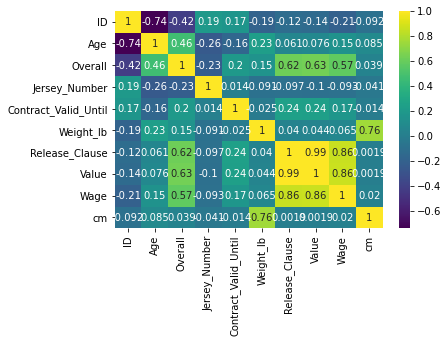

In [250]:
# 과제
# 선수들의 연봉/wage를 예측하는 모델 구축
# 주어진 데이터를 전처리 및 탐색하여 모델에 적합한 분석용 데이터셋을 작성하고 그 근거를 설명하세요.
# 10개 이상 전처리
fifa.corr() # 데이터 상관관계 파악 (Value, Release_Clause, Overall)
sns.heatmap(fifa.corr(), annot = True, cmap = 'viridis')


In [ ]:
t = fifa.drop(['ID','Name','Preferred_Foot','Work_Rate','Height','Weight_lb','cm'],axis=1) # 연봉과 상관관계가 낮은 불필요한 컬럼들 삭제
t

In [ ]:
# 연봉을 단위별로 구분해 1 ~ 12 등급으로 구분
t.describe()['Wage'] # 연봉 등급 세분화 원소 평균을 기준으로 1단계씩 상승 ex)11등급 = (min + std) 10등급 = 11등급 + std...

In [196]:
def wage_c(a): # 등급 = Wage_d
    g = 9.618375
    if a < g:
        a = 12
    elif a < (g*2):
        a = 11 
    elif a < (g*3):
        a = 10
    elif a < (g*4):
        a = 9
    elif a < (g*5):
        a = 8
    elif a < (g*6):
        a = 7
    elif a < (g*7):
        a = 6
    elif a < (g*8):
        a = 5 
    elif a < (g*8):
        a = 4 
    elif a < (g*10):
        a = 3
    elif a < (g*11):
        a = 2 
    else:
        a = 1
    return a

wa_cla = t['Wage'].apply(wage_c)
t['Wage_d'] = wa_cla
t

,Age,Nationality,Overall,Club,Position,Jersey_Number,Contract_Valid_Until,Release_Clause,Value,Wage,Wage_d
0,31,Argentina,94,FC Barcelona,RF,10,2021,226500,110500,565,1
1,33,Portugal,94,Juventus,ST,7,2022,127100,77000,405,1
2,26,Brazil,92,Paris Saint-Germain,LW,10,2022,228100,118500,290,1
3,27,Spain,91,Manchester United,GK,1,2020,138600,72000,260,1
4,27,Belgium,91,Manchester City,RCM,7,2023,196400,102000,355,1
...,...,...,...,...,...,...,...,...,...,...,...
16637,19,England,47,Crewe Alexandra,CM,22,2019,143,60,1,12
16638,19,Sweden,47,Trelleborgs FF,ST,21,2020,113,60,1,12
16639,16,England,47,Cambridge United,ST,33,2021,165,60,1,12
16640,17,England,47,Tranmere Rovers,RW,34,2019,143,60,1,12


In [230]:
dt2 = t[['Nationality','Wage_d','Overall']].groupby(['Nationality']).mean() # 나라별 평균 등급, 오버롤
pd.set_option('max_rows',10)
dt2.sort_values(['Wage_d']) # 오버롤이 높은 나라순

,Wage_d,Overall
Nationality,,
Dominican Republic,6.500000,72.000000
United Arab Emirates,8.000000,77.000000
Egypt,10.450000,71.000000
Gabon,10.571429,70.000000
Equatorial Guinea,10.600000,70.000000
...,...,...
Indonesia,12.000000,56.000000
Hong Kong,12.000000,60.500000
Guyana,12.000000,61.666667


In [248]:
dt = t[['Release_Clause','Value','Overall','Wage_d']].groupby(['Wage_d']).mean() # 등급 별 평균 값(상관관계 올라감)
dt.corr()

,Release_Clause,Value,Overall
Release_Clause,1.000000,0.999762,0.856644
Value,0.999762,1.000000,0.859635
Overall,0.856644,0.859635,1.000000


<AxesSubplot:ylabel='Club'>

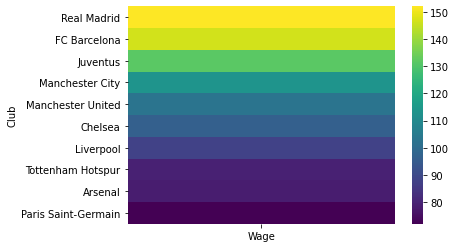

In [253]:
cw = t[['Club','Wage']].groupby(['Club']).mean()
c_top = cw.sort_values(by=['Wage'],axis=0,ascending=False) # 평균 연봉이 높은 팀 상위 10개
sns.heatmap(c_top.head(10), cmap = 'viridis')

In [ ]:
# 불필요한 변수 필터링(결측값 처리)
# 파생변수 생성 ex) ft -> cm 변환하는 사용자 함수
# 그룹화
# 데이터 타입 변경
# 상관관계 파악
# 중복변수 제거 ft->cm 했으면 중복변수 ft = cm
# 이상치 : 평균에서 크게 벗어나는 값
# 사용가능 데이터로 변환
